# TP 2 : Indicateurs Intraday

Le but de ce TP est de se failiariser avec `pandas` et les bases de données et de construire les courbes intraday de certains indicateurs de marché tels que le volumes, le nombre de trades, le prix, la volatilité, le spread, l'imbalance ou encore la liquidité disponible au meilleures limites (best bid et best ask).

## I. Importation des modules nécessaires

In [36]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pylab as plt
from datetime import datetime

## II. Importation et lecture des données

Pour importer un fichier

In [37]:
df_trades1  = pd.read_pickle('./data_trades/strades_info_720.h5')

Afficher uniquement le début (5 premières lignes)

In [38]:
df_trades1.head(3)

,provider,source,ts_market,qty,price,side,type,volume,bid_size,bid,ask,ask_size,cmp_name
0,NOMURA,CHIX,2014-10-28,0,0,?,,0,0,0,0,0,Vodafone Group PLC
1,NOMURA,TURQUOISE,2014-10-28,0,0,?,,0,0,0,0,0,Vodafone Group PLC
2,NOMURA,BATS.EUROPE,2014-10-28,0,0,?,,0,0,0,0,0,Vodafone Group PLC


Afficher les 5 dernières lignes

On distingue donc différentes colonnes
* la première est l'index, ici le nombre de lignes ;



* _provider_ est le fournisseur des données ; 



* _source_ est le nom de l'exchange ;



* _ts market_ est le timestamp du trade ;



* _qty_ est le volume du trade ;



* _price_ est le prix du trade ;



* _side_ représente le sens ou signe du trade (B=Bid et A=Ask) ;



* _type_ est le type d'ordre ;



* _volume_ est le volume cumulé depuis le début de la journée ;



* _bid size_ est la taille du best bid ;



* _ask size_ est la taille du best ask ;



* _bid_ est le prix du best bid ;



* _ask_ est le prix du best ask ;



* _cmp name_ est le nom de l'action.

Importations des autres données

In [39]:
df_trades2  = pd.read_pickle('./data_trades/strades_info_1102.h5')

In [40]:
df_trades3  = pd.read_pickle('./data_trades/strades_info_1662.h5')

In [41]:
df_trades4  = pd.read_pickle('./data_trades/strades_info_1664.h5')

In [42]:
df_trades5  = pd.read_pickle('./data_trades/strades_info_2255.h5')

In [43]:
df_trades6  = pd.read_pickle('./data_trades/strades_info_2574.h5')

In [44]:
df_trades7  = pd.read_pickle('./data_trades/strades_info_2586.h5')

In [45]:
df_trades8  = pd.read_pickle('./data_trades/strades_info_5685.h5')

In [46]:
df_trades9  = pd.read_pickle('./data_trades/strades_info_8695864.h5')

## II. Nettoyer les données

Si vous regardez attentivement la base de données chargée, vous verrez qu'il y a un certain nombre de donnée qui posent problèmes. On distingue notamment

* des volumes nuls ;


* des prix ou quantités au best bid ou au best ask nuls ;


* des prix ou quantités au best bid ou au best ask de 999999 ;


* des sens de trades différents de Bid ou Ask  (U notamment) ;


* des trades en dehors des heures d'ouverture de l'exchange.

In [47]:
df_trades1 = df_trades1[df_trades1['qty']!=0]
df_trades1 = df_trades1[df_trades1['volume']!=0]
df_trades1 = df_trades1[df_trades1['bid']<df_trades1['ask']]
df_trades1 = df_trades1[df_trades1['bid']!=0]
df_trades1 = df_trades1[df_trades1['bid']!=999999]
df_trades1 = df_trades1[df_trades1['ask']!=0]
df_trades1 = df_trades1[df_trades1['ask']!=999999]
df_trades1 = df_trades1[df_trades1['side']!='U']
df_trades1 = df_trades1[df_trades1['ts_market']>datetime(2014, 10, 28, 8, 0)]
df_trades1 = df_trades1[df_trades1['ts_market']<datetime(2014, 10, 28, 16, 30)]

In [48]:
df_trades2 = df_trades2[df_trades2['qty']!=0]
df_trades2 = df_trades2[df_trades2['volume']!=0]
df_trades2 = df_trades2[df_trades2['bid']<df_trades2['ask']]
df_trades2 = df_trades2[df_trades2['bid']!=0]
df_trades2 = df_trades2[df_trades2['bid']!=999999]
df_trades2 = df_trades2[df_trades2['ask']!=0]
df_trades2 = df_trades2[df_trades2['ask']!=999999]
df_trades2 = df_trades2[df_trades2['side']!='U']
df_trades2 = df_trades2[df_trades2['ts_market']>datetime(2014, 10, 22, 7, 0)]
df_trades2 = df_trades2[df_trades2['ts_market']<datetime(2014, 10, 22, 15, 30)]

In [49]:
df_trades3 = df_trades3[df_trades3['qty']!=0]
df_trades3 = df_trades3[df_trades3['volume']!=0]
df_trades3 = df_trades3[df_trades3['bid']<df_trades3['ask']]
df_trades3 = df_trades3[df_trades3['bid']!=0]
df_trades3 = df_trades3[df_trades3['bid']!=999999]
df_trades3 = df_trades3[df_trades3['ask']!=0]
df_trades3 = df_trades3[df_trades3['ask']!=999999]
df_trades3 = df_trades3[df_trades3['side']!='U']
df_trades3 = df_trades3[df_trades3['ts_market']>datetime(2014, 11, 21, 8, 0)]
df_trades3 = df_trades3[df_trades3['ts_market']<datetime(2014, 11, 21, 16, 30)]

In [50]:
df_trades4 = df_trades4[df_trades4['qty']!=0]
df_trades4 = df_trades4[df_trades4['volume']!=0]
df_trades4 = df_trades4[df_trades4['bid']<df_trades4['ask']]
df_trades4 = df_trades4[df_trades4['bid']!=0]
df_trades4 = df_trades4[df_trades4['bid']!=999999]
df_trades4 = df_trades4[df_trades4['ask']!=0]
df_trades4 = df_trades4[df_trades4['ask']!=999999]
df_trades4 = df_trades4[df_trades4['side']!='U']
df_trades4 = df_trades4[df_trades4['ts_market']>datetime(2014, 10, 31, 8, 0)]
df_trades4 = df_trades4[df_trades4['ts_market']<datetime(2014, 10, 31, 16, 30)]

In [51]:
df_trades5 = df_trades5[df_trades5['qty']!=0]
df_trades5 = df_trades5[df_trades5['volume']!=0]
df_trades5 = df_trades5[df_trades5['bid']<df_trades5['ask']]
df_trades5 = df_trades5[df_trades5['bid']!=0]
df_trades5 = df_trades5[df_trades5['bid']!=999999]
df_trades5 = df_trades5[df_trades5['ask']!=0]
df_trades5 = df_trades5[df_trades5['ask']!=999999]
df_trades5 = df_trades5[df_trades5['side']!='U']
df_trades5 = df_trades5[df_trades5['ts_market']>datetime(2014, 11, 24, 8, 0)]
df_trades5 = df_trades5[df_trades5['ts_market']<datetime(2014, 11, 24, 16, 30)]

In [52]:
df_trades6 = df_trades6[df_trades6['qty']!=0]
df_trades6 = df_trades6[df_trades6['volume']!=0]
df_trades6 = df_trades6[df_trades6['bid']<df_trades6['ask']]
df_trades6 = df_trades6[df_trades6['bid']!=0]
df_trades6 = df_trades6[df_trades6['bid']!=999999]
df_trades6 = df_trades6[df_trades6['ask']!=0]
df_trades6 = df_trades6[df_trades6['ask']!=999999]
df_trades6 = df_trades6[df_trades6['side']!='U']
df_trades6 = df_trades6[df_trades6['ts_market']>datetime(2014, 11, 13, 8, 0)]
df_trades6 = df_trades6[df_trades6['ts_market']<datetime(2014, 11, 13, 16, 30)]

In [53]:
df_trades7 = df_trades7[df_trades7['qty']!=0]
df_trades7 = df_trades7[df_trades7['volume']!=0]
df_trades7 = df_trades7[df_trades7['bid']<df_trades7['ask']]
df_trades7 = df_trades7[df_trades7['bid']!=0]
df_trades7 = df_trades7[df_trades7['bid']!=999999]
df_trades7 = df_trades7[df_trades7['ask']!=0]
df_trades7 = df_trades7[df_trades7['ask']!=999999]
df_trades7 = df_trades7[df_trades7['side']!='U']
df_trades7 = df_trades7[df_trades7['ts_market']>datetime(2014, 11, 3, 8, 0)]
df_trades7 = df_trades7[df_trades7['ts_market']<datetime(2014, 11, 3, 16, 30)]

In [54]:
df_trades8 = df_trades8[df_trades8['qty']!=0]
df_trades8 = df_trades8[df_trades8['volume']!=0]
df_trades8 = df_trades8[df_trades8['bid']<df_trades8['ask']]
df_trades8 = df_trades8[df_trades8['bid']!=0]
df_trades8 = df_trades8[df_trades8['bid']!=999999]
df_trades8 = df_trades8[df_trades8['ask']!=0]
df_trades8 = df_trades8[df_trades8['ask']!=999999]
df_trades8 = df_trades8[df_trades8['side']!='U']
df_trades8 = df_trades8[df_trades8['ts_market']>datetime(2014, 11, 20, 8, 0)]
df_trades8 = df_trades8[df_trades8['ts_market']<datetime(2014, 11, 20, 16, 30)]

In [55]:
df_trades9 = df_trades9[df_trades9['qty']!=0]
df_trades9 = df_trades9[df_trades9['volume']!=0]
df_trades9 = df_trades9[df_trades9['bid']<df_trades9['ask']]
df_trades9 = df_trades9[df_trades9['bid']!=0]
df_trades9 = df_trades9[df_trades9['bid']!=999999]
df_trades9 = df_trades9[df_trades9['ask']!=0]
df_trades9 = df_trades9[df_trades9['ask']!=999999]
df_trades9 = df_trades9[df_trades9['side']!='U']
df_trades9 = df_trades9[df_trades9['ts_market']>datetime(2014, 11, 17, 8, 0)]
df_trades9 = df_trades9[df_trades9['ts_market']<datetime(2014, 11, 17, 16, 30)]

In [81]:
df_trades1.head(1)

,provider,source,qty,price,side,type,volume,bid_size,bid,ask,ask_size,cmp_name,trades
ts_market,,,,,,,,,,,,,
2014-10-28 08:00:24.373,NOMURA,CHIX,5036,198.95,A,N,5036,1359,198.7,198.95,6844,Vodafone Group PLC,1


## III. Modification de la base de données

### 1. Ajout de la colonne pour compter les trades

In [57]:
col = np.ones(len(df_trades1))
df_trades1['trades'] = col
df_trades1.head(1)

,provider,source,ts_market,qty,price,side,type,volume,bid_size,bid,ask,ask_size,cmp_name,trades
17,NOMURA,CHIX,2014-10-28 08:00:24.373,5036,198.95,A,N,5036,1359,198.7,198.95,6844,Vodafone Group PLC,1


In [58]:
col = np.ones(len(df_trades2))
df_trades2['trades'] = col
col = np.ones(len(df_trades3))
df_trades3['trades'] = col
col = np.ones(len(df_trades4))
df_trades4['trades'] = col
col = np.ones(len(df_trades5))
df_trades5['trades'] = col
col = np.ones(len(df_trades6))
df_trades6['trades'] = col
col = np.ones(len(df_trades7))
df_trades7['trades'] = col
col = np.ones(len(df_trades8))
df_trades8['trades'] = col
col = np.ones(len(df_trades9))
df_trades9['trades'] = col

### 2. Réindexer la base de données par les temps

In [59]:
df_trades1 = df_trades1.set_index('ts_market')

In [60]:
df_trades2 = df_trades2.set_index('ts_market')
df_trades3 = df_trades3.set_index('ts_market')
df_trades4 = df_trades4.set_index('ts_market')
df_trades5 = df_trades5.set_index('ts_market')
df_trades6 = df_trades6.set_index('ts_market')
df_trades7 = df_trades7.set_index('ts_market')
df_trades8 = df_trades8.set_index('ts_market')
df_trades9 = df_trades9.set_index('ts_market')

## IV. Graphiques des différents indicateurs intraday

### 1. Création d'un vecteur heures de la journée

In [61]:
Time = np.linspace(8,16.5,102)

### 2. Courbes de volume en % pour comparer les différents actifs

On doit faire la somme par tranche de 5 minutes des volumes traités puis renormaliser par le volume total.

In [83]:
CourbVolume1 = df_trades1['qty'].resample('5Min',how='sum')
CourbVolume1 = CourbVolume1/CourbVolume1.sum()
CourbVolume1.head(1)

ts_market
2014-10-28 08:00:00    0.018561
Freq: 5T, Name: qty, dtype: float64

In [71]:
CourbVolume1.tail(1)

ts_market
2014-10-28 16:25:00    0.03601
Freq: 5T, Name: qty, dtype: float64

On obtient alors le graphique suivant

(8, 16.5)

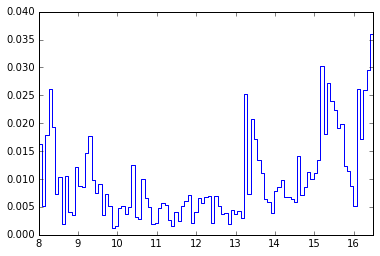

In [63]:
plt.step(Time,CourbVolume1)
plt.xlim(8,16.5)

Maintenant si on le fait pour tous les actifs, on a alors

(8, 16.5)

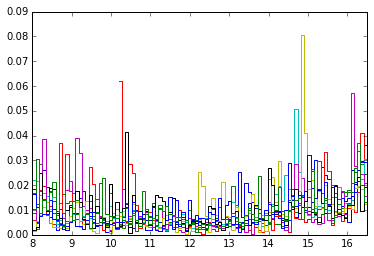

In [64]:
CourbVolume2 = df_trades2['qty'].resample('5Min',how='sum')
CourbVolume2 = CourbVolume2/CourbVolume2.sum()
CourbVolume3 = df_trades3['qty'].resample('5Min',how='sum')
CourbVolume3 = CourbVolume3/CourbVolume3.sum()
CourbVolume4 = df_trades4['qty'].resample('5Min',how='sum')
CourbVolume4 = CourbVolume4/CourbVolume4.sum()
CourbVolume5 = df_trades5['qty'].resample('5Min',how='sum')
CourbVolume5 = CourbVolume5/CourbVolume5.sum()
CourbVolume6 = df_trades6['qty'].resample('5Min',how='sum')
CourbVolume6 = CourbVolume6/CourbVolume6.sum()
CourbVolume7 = df_trades7['qty'].resample('5Min',how='sum')
CourbVolume7 = CourbVolume7/CourbVolume7.sum()
CourbVolume8 = df_trades8['qty'].resample('5Min',how='sum')
CourbVolume8 = CourbVolume8/CourbVolume8.sum()
CourbVolume9 = df_trades9['qty'].resample('5Min',how='sum')
CourbVolume9 = CourbVolume9/CourbVolume9.sum()
plt.step(Time,CourbVolume1)
plt.step(Time,CourbVolume2)
plt.step(Time,CourbVolume3)
plt.step(Time,CourbVolume4)
plt.step(Time,CourbVolume5)
plt.step(Time,CourbVolume6)
plt.step(Time,CourbVolume7)
plt.step(Time,CourbVolume8)
plt.step(Time,CourbVolume9)
plt.xlim(8,16.5)

In [85]:
CourbVolume3.head()

ts_market
2014-11-21 08:00:00    0.008876
2014-11-21 08:05:00    0.005838
2014-11-21 08:10:00    0.004728
2014-11-21 08:15:00    0.018104
2014-11-21 08:20:00    0.019481
Freq: 5T, Name: qty, dtype: float64

### 3. A faire 

En plus des courbes de volumes précédentes (toujours par tranche de 5 minutes), il faut faire et commenter les graphiques suivants


* Répartition du nombre de trades ;


* Prix moyen ;


* Spread moyen ; 


* Volatilité ;


* Imbalance ($|Q_{ask}-Q_{bid}|$ ou $Q_{ask}-Q_{bid}$ si vous voulez avoir le sens du déséquilibre) ;


* Quantités best limits ($Q_{ask}+Q_{bid}$).